In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/tracking_week_4.csv')
data

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022092900,57,42654.0,La'el Collins,1,2022-09-29 20:16:00.099999,71.0,CIN,left,86.210000,30.880000,0.00,0.00,0.00,262.60,246.29,NaN
1,2022092900,57,42654.0,La'el Collins,2,2022-09-29 20:16:00.200000,71.0,CIN,left,86.210000,30.880000,0.00,0.00,0.00,263.32,234.76,NaN
2,2022092900,57,42654.0,La'el Collins,3,2022-09-29 20:16:00.299999,71.0,CIN,left,86.210000,30.870000,0.01,0.23,0.01,263.32,173.85,NaN
3,2022092900,57,42654.0,La'el Collins,4,2022-09-29 20:16:00.400000,71.0,CIN,left,86.210000,30.860000,0.07,0.69,0.01,263.32,191.83,NaN
4,2022092900,57,42654.0,La'el Collins,5,2022-09-29 20:16:00.500000,71.0,CIN,left,86.210000,30.850000,0.19,1.01,0.02,263.32,192.85,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418681,2022100300,3939,NaN,football,53,2022-10-03 23:01:56.799999,NaN,football,left,51.700001,16.990000,0.64,1.66,0.08,NaN,NaN,tackle
1418682,2022100300,3939,NaN,football,54,2022-10-03 23:01:56.900000,NaN,football,left,51.950001,16.760000,0.63,1.75,0.33,NaN,NaN,NaN
1418683,2022100300,3939,NaN,football,55,2022-10-03 23:01:57.000000,NaN,football,left,51.990002,16.639999,0.53,1.20,0.13,NaN,NaN,NaN
1418684,2022100300,3939,NaN,football,56,2022-10-03 23:01:57.099999,NaN,football,left,52.009998,16.610001,0.44,0.60,0.03,NaN,NaN,NaN


In [4]:
data[['gameId', 'playId']].value_counts()

gameId      playId
2022100206  1224      2806
2022100205  3163      2714
2022100300  1547      2691
2022100212  2366      2576
2022100205  2648      2254
                      ... 
2022100213  3243       253
2022100211  1899       253
2022100209  3098       253
2022100201  1528       253
2022100207  1458       161
Name: count, Length: 1435, dtype: int64

In [5]:
data.groupby(['gameId', 'playId']).nflId.nunique()

gameId      playId
2022092900  57        22
            78        22
            102       22
            126       22
            150       22
                      ..
2022100300  3793      22
            3821      22
            3882      22
            3906      22
            3939      22
Name: nflId, Length: 1435, dtype: int64

In [55]:
data['delta_s'] = data.groupby(['gameId', 'playId', 'nflId'])['s'].diff()

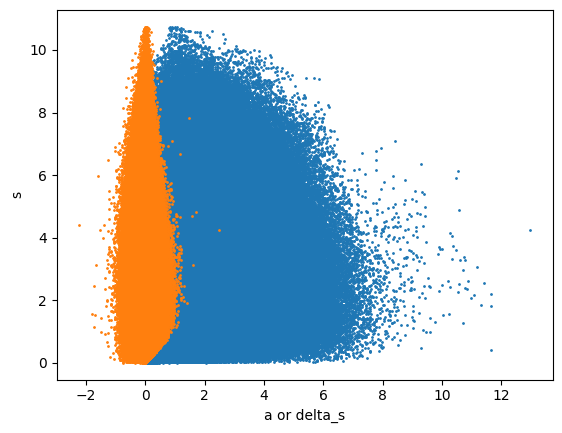

In [58]:
display_data = data[data['club'] != 'football']
plt.scatter(display_data['a'], display_data['s'], s=1);
plt.scatter(display_data['delta_s'], display_data['s'], s=1);
plt.xlabel('a or delta_s');
plt.ylabel('s');

(np.float64(-1.01), np.float64(0.96))

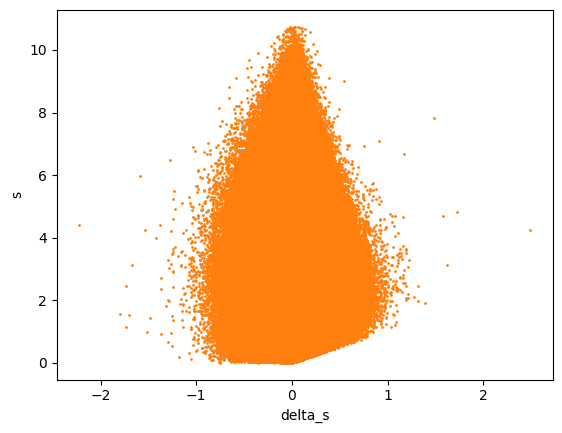

In [59]:
display_data = data[data['club'] != 'football']
plt.scatter(display_data['delta_s'], display_data['s'], s=1, color='C1');
plt.xlabel('delta_s');
plt.ylabel('s');
display_data['delta_s'].quantile(0.0001), display_data['delta_s'].quantile(0.9999)

In [63]:
data['delta_dir'] = data.groupby(['gameId', 'playId', 'nflId'])['dir'].diff()

count    1.325434e+06
mean    -1.602044e-02
std      4.420802e+01
min     -3.599500e+02
25%     -2.540000e+00
50%      6.000000e-02
75%      2.730000e+00
max      3.599300e+02
Name: delta_dir, dtype: float64

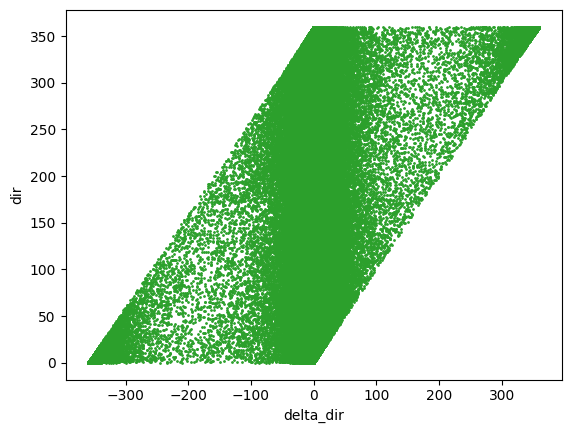

In [64]:
display_data = data[data['club'] != 'football']
plt.scatter(data['delta_dir'], data['dir'], s=1, color='C2');
plt.xlabel('delta_dir');
plt.ylabel('dir');
data['delta_dir'].describe()

In [93]:
data['movement_angle'] = np.degrees(np.arctan2(data['y'].diff(), data['x'].diff())) + 180

In [94]:
(data['x'] - data['x'].shift(1)).describe()

count    1.418685e+06
mean    -2.409273e-05
std      1.844014e+00
min     -9.336000e+01
25%     -1.200000e-01
50%      0.000000e+00
75%      1.200000e-01
max      8.249000e+01
Name: x, dtype: float64

In [97]:
data[['movement_angle', 'dir', 's', 'x', 'y']]

,movement_angle,dir,s,x,y
0,NaN,246.29,0.00,86.210000,30.880000
1,180.000000,234.76,0.00,86.210000,30.880000
2,90.000000,173.85,0.01,86.210000,30.870000
3,90.000000,191.83,0.07,86.210000,30.860000
4,90.000000,192.85,0.19,86.210000,30.850000
...,...,...,...,...,...
1418681,150.254446,NaN,0.64,51.700001,16.990000
1418682,137.386001,NaN,0.63,51.950001,16.760000
1418683,108.435222,NaN,0.53,51.990002,16.639999
1418684,123.686705,NaN,0.44,52.009998,16.610001


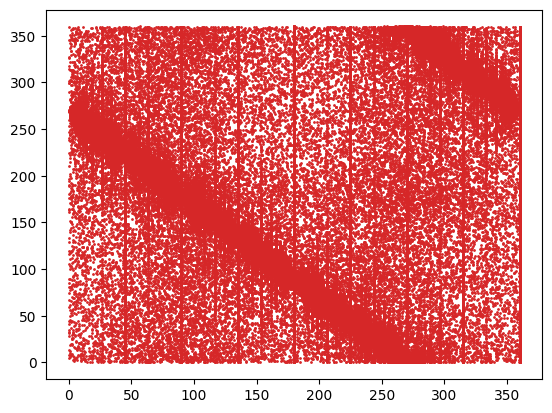

In [96]:
plt.scatter(data['movement_angle'], data['dir'], s=1, color='C3');